<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


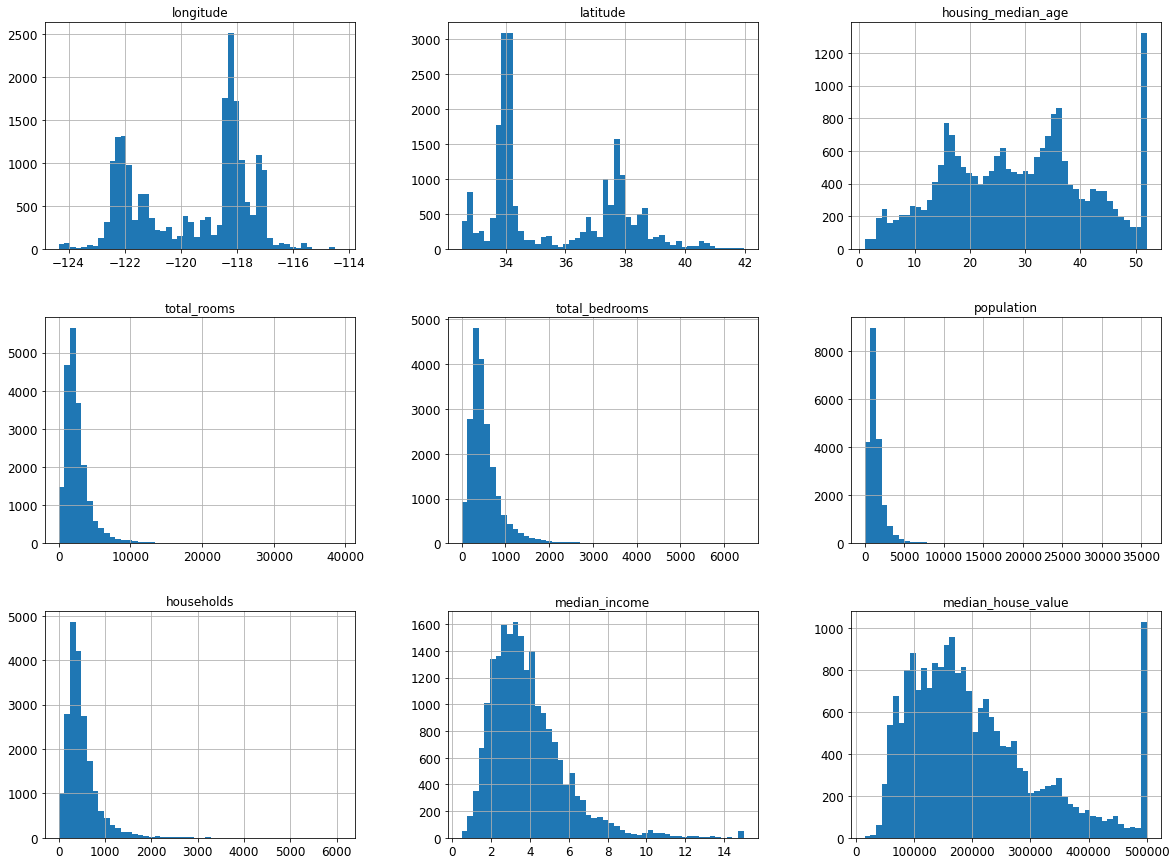

16512
4128


In [3]:
import os
import tarfile
import urllib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"


# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

fetch_housing_data()
housing = load_housing_data()
housing.head()
housing.info()
housing.hist(bins=50, figsize=(20,15))
plt.show()

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

print (len(train_set))
print (len(test_set))


<AxesSubplot:>

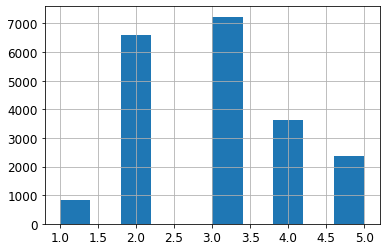

In [4]:
housing["income_cat"] = pd.cut(housing["median_income"],
bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
labels=[1, 2, 3, 4, 5])
housing["income_cat"].hist()

In [5]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [6]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [7]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [8]:
housing = strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

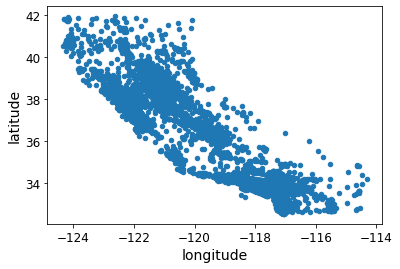

In [9]:
housing.plot(kind="scatter", x="longitude", y="latitude")

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

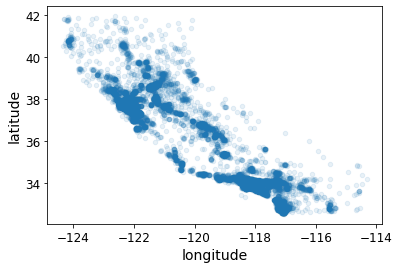

In [10]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)


Text(0.5, 1.0, 'Home Value Scatter Plot')

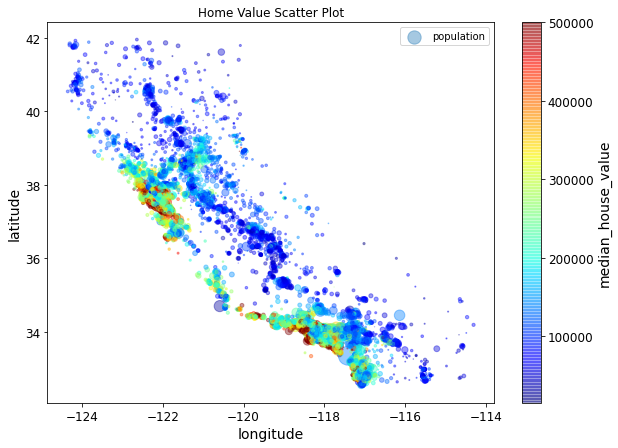

In [11]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
        s=housing["population"]/100, label="population", figsize=(10,7),
        c="median_house_value", cmap=plt.get_cmap("jet"),colorbar=True, 
             sharex=False)
plt.legend()
plt.title("Home Value Scatter Plot")


In [12]:
#download california image
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "end_to_end_project")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('.\\images\\end_to_end_project\\california.png',
 <http.client.HTTPMessage at 0x1cfb8a06c40>)

Saving figure california_housing_prices_plot


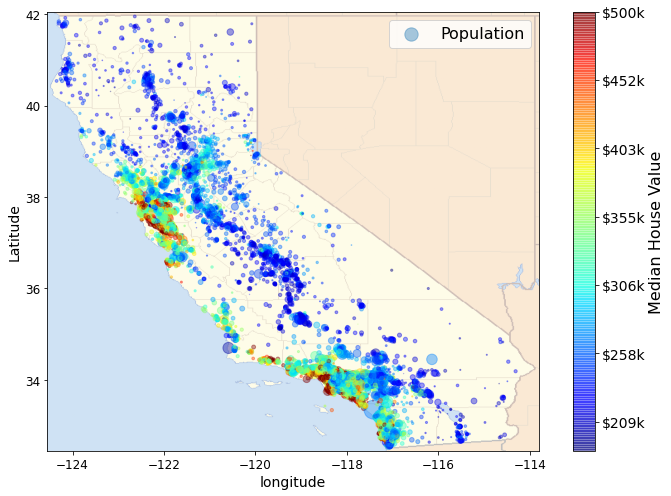

In [13]:
import matplotlib.image as mpimg
california_img = mpimg.imread(os.path.join(images_path, filename))
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                 s=housing["population"]/100, label="Population",
                 c="median_house_value", cmap=plt.get_cmap("jet"),
                 colorbar=False, alpha=0.4, sharex=False
                 )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05],
           alpha=0.5, cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label("Median House Value", fontsize=16)

plt.legend(fontsize=16)
save_fig("california_housing_prices_plot")
plt.show()

In [14]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values (ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

Saving figure scatter_matrix_plot


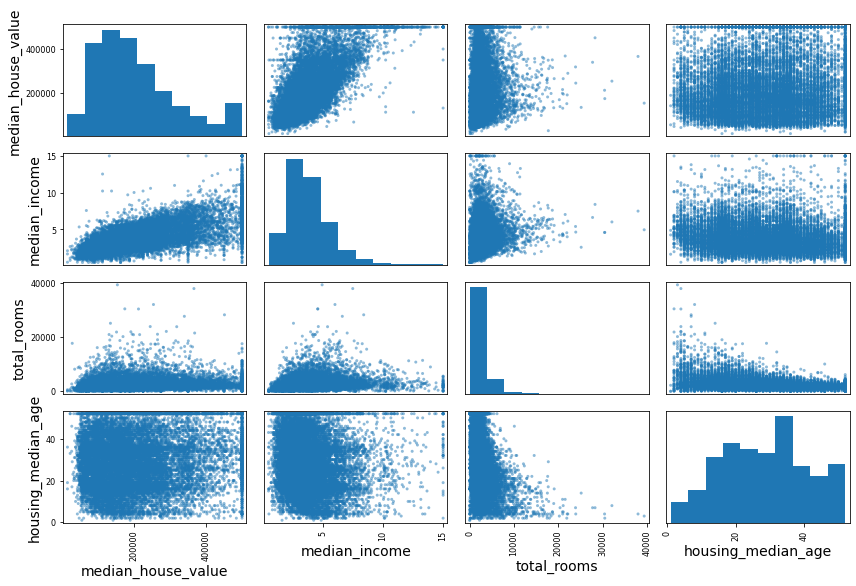

In [15]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", 
              "total_rooms", "housing_median_age"]

scatter_matrix(housing[attributes],figsize=(12,8))
save_fig("scatter_matrix_plot")

(0.0, 16.0, 0.0, 550000.0)

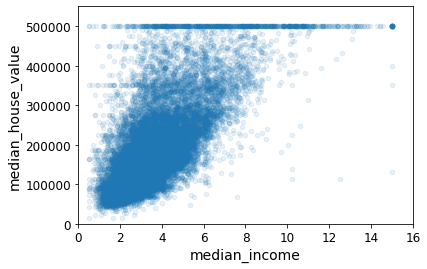

In [16]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)
plt.axis([0, 16, 0, 550000])

In [17]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]


In [18]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

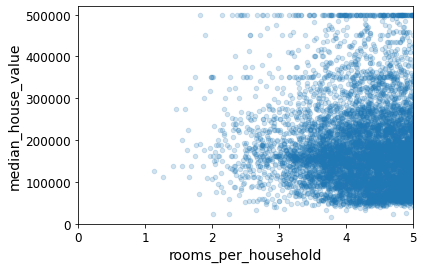

In [19]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
            alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

In [20]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()


In [21]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN


In [215]:
sample_incomplete_rows.dropna(subset=["total_bedrooms"])


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [216]:
sample_incomplete_rows.drop("total_bedrooms", axis=1)


,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,3468.0,1405.0,3.1662,<1H OCEAN


In [33]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

housing_num = housing.drop("ocean_proximity", axis=1)


In [34]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [35]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [36]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [37]:
X = imputer.transform(housing_num)


In [38]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)


In [39]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


In [40]:
housing_cat = housing[["ocean_proximity"]]
#housing_cat.head(10)
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN
19480,-120.97,37.66,24.0,2930.0,588.0,1448.0,570.0,3.5395,INLAND
8879,-118.50,34.04,52.0,2233.0,317.0,769.0,277.0,8.3839,<1H OCEAN
13685,-117.24,34.15,26.0,2041.0,293.0,936.0,375.0,6.0000,INLAND
4937,-118.26,33.99,47.0,1865.0,465.0,1916.0,438.0,1.8242,<1H OCEAN
4861,-118.28,34.02,29.0,515.0,229.0,2690.0,217.0,0.4999,<1H OCEAN


In [41]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [42]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [43]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [44]:
housing_cat_1hot.toarray()


array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [45]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [46]:
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [47]:
from sklearn.base import BaseEstimator, TransformerMixin

#column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix]/X[:, households_ix]
        population_per_household = X[:, population_ix]/X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix]/X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, 
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)        


In [48]:
import numpy as np
x = np.array([[ 0.5,  1,  2],
              [ 3,  4,  5],
              [ 6,  7,  8], 
              [ 9, 10, 11]])

In [49]:
x[:,2]

array([ 2.,  5.,  8., 11.])

In [50]:
fraction1= x[:,2]/x[:,1]
fraction2= x[:,1]/x[:,0]

np.c_[x, fraction1, fraction2]

array([[ 0.5       ,  1.        ,  2.        ,  2.        ,  2.        ],
       [ 3.        ,  4.        ,  5.        ,  1.25      ,  1.33333333],
       [ 6.        ,  7.        ,  8.        ,  1.14285714,  1.16666667],
       [ 9.        , 10.        , 11.        ,  1.1       ,  1.11111111]])

In [51]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs, 
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN,4.625369,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN,6.00885,2.707965
14650,-117.2,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN,4.225108,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND,5.232295,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN,4.50581,3.047847


In [52]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [53]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)    
    ])
housing_prepared = full_pipeline.fit_transform(housing)

In [54]:
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [55]:
housing_prepared.shape


(16512, 16)

In [56]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)


LinearRegression()

In [57]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions: ", lin_reg.predict(some_data_prepared))

Predictions:  [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]


In [58]:
print("Labels: ", list(some_labels))

Labels:  [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [59]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


housing_predictions = lin_reg.predict(housing_prepared)

lin_mae_score = mean_absolute_error(housing_labels, housing_predictions)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)

print("Mean abs error: ", lin_mae_score)
print("Mean squared root error: ", lin_rmse)

Mean abs error:  49439.89599001897
Mean squared root error:  68628.19819848923


In [60]:
print(len(housing_prepared))

16512


In [61]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
print(tree_rmse)


0.0


In [62]:
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, 
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)



def display_scores(scores):
    print ("Scores: ", scores)
    print ("Mean: ", scores.mean())
    print ("Standard Deviation", scores.std())
    
display_scores(tree_rmse_scores)

Scores:  [69417.81199166 66047.56957324 70403.80184357 69808.62297185
 71662.91625132 74469.50381751 70238.89599531 71360.67168971
 76651.61437777 69778.90680784]
Mean:  70984.03153197707
Standard Deviation 2746.274918860064


In [63]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores:  [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean:  69052.46136345083
Standard Deviation 2731.6740017983457


In [64]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=42)

In [65]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
print(forest_rmse)

18603.515021376355


In [66]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                               scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores:  [49519.80364233 47461.9115823  50029.02762854 52325.28068953
 49308.39426421 53446.37892622 48634.8036574  47585.73832311
 53490.10699751 50021.5852922 ]
Mean:  50182.303100336096
Standard Deviation 2097.0810550985693


In [67]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators':[3, 10, 30], 'max_features':[2, 4, 6, 8]},
    {'bootstrap':[False], 'n_estimators':[3, 10], 'max_features':[2, 3,4]}
    ]
forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [68]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [69]:
cv_result = grid_search.cv_results_
for mean_score, params in zip(cv_result["mean_test_score"], 
                              cv_result["params"]):
    print(np.sqrt(-mean_score),params)

63781.175108859934 {'max_features': 2, 'n_estimators': 3}
55619.41795809421 {'max_features': 2, 'n_estimators': 10}
53091.31625190489 {'max_features': 2, 'n_estimators': 30}
59919.51627101888 {'max_features': 4, 'n_estimators': 3}
52748.708330583824 {'max_features': 4, 'n_estimators': 10}
50293.34207771358 {'max_features': 4, 'n_estimators': 30}
58139.445363439656 {'max_features': 6, 'n_estimators': 3}
52631.52417246216 {'max_features': 6, 'n_estimators': 10}
50046.18219237559 {'max_features': 6, 'n_estimators': 30}
58846.7334811435 {'max_features': 8, 'n_estimators': 3}
52573.90493267924 {'max_features': 8, 'n_estimators': 10}
50260.938625427814 {'max_features': 8, 'n_estimators': 30}
62094.931675347834 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54288.895329501596 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60296.3851581578 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52669.154396139296 {'bootstrap': False, 'max_features': 3, 'n_estimators

In [70]:
feature_importances = grid_search.best_estimator_.feature_importances_

In [71]:
print(feature_importances)

[7.51182853e-02 6.82225985e-02 4.35603474e-02 1.90214354e-02
 1.73539410e-02 1.78409679e-02 1.64508896e-02 2.84820819e-01
 5.88625760e-02 1.09430881e-01 1.07919311e-01 1.31041881e-02
 1.61168020e-01 5.88269495e-05 2.65594535e-03 4.41096722e-03]


In [72]:
extra_attribs = ["rooms_per_hhold","pop_per_hhold","bedrooms_pre_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.2848208186934172, 'median_income'),
 (0.16116802030532426, 'INLAND'),
 (0.10943088108656869, 'pop_per_hhold'),
 (0.10791931129177292, 'bedrooms_pre_room'),
 (0.07511828528773319, 'longitude'),
 (0.06822259847464776, 'latitude'),
 (0.05886257595434607, 'rooms_per_hhold'),
 (0.0435603473977914, 'housing_median_age'),
 (0.019021435375448963, 'total_rooms'),
 (0.017840967921942126, 'population'),
 (0.01735394100996426, 'total_bedrooms'),
 (0.016450889603162093, 'households'),
 (0.013104188077871623, '<1H OCEAN'),
 (0.00441096722468291, 'NEAR OCEAN'),
 (0.002655945345793544, 'NEAR BAY'),
 (5.882694953306998e-05, 'ISLAND')]

In [73]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [74]:
print(final_rmse)

48001.99526733928


In [75]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                        loc=squared_errors.mean(),
                        scale=stats.sem(squared_errors)))


array([46006.31730092, 49917.95135718])

In [76]:
from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')

svr_rbf.fit(housing_prepared, housing_labels)
svr_lin.fit(housing_prepared, housing_labels)

svr_rbf_predictions = svr_rbf.predict(housing_prepared)
svr_rbf_mse = mean_squared_error(housing_labels, svr_rbf_predictions)
svr_rbf_rmse = np.sqrt(svr_rbf_mse)

svr_lin_predictions = svr_lin.predict(housing_prepared)
svr_lin_mse = mean_squared_error(housing_labels, svr_lin_predictions)
svr_lin_rmse = np.sqrt(svr_lin_mse)

print("SVR RBF's ", svr_rbf_rmse)
print("SVR LIN's ", svr_lin_rmse)



SVR RBF's  95556.28260419655
SVR LIN's  71261.20809409635


In [ ]:
svr_param_grid = [
    {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
        {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
         'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]
svr_reg = SVR()

svr_grid_search = GridSearchCV(svr_reg, svr_param_grid, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)
svr_grid_search.fit(housing_prepared, housing_labels)

In [ ]:
svr_grid_search.best_params_

In [ ]:
cv_result = svr_grid_search.cv_results_
for mean_score, params in zip(cv_result["mean_test_score"], 
                              cv_result["params"]):
    print(np.sqrt(-mean_score),params)

In [ ]:
final_model = svr_grid_search.best_estimator_

X_test_svr = strat_test_set.drop("median_house_value", axis=1)
y_test_svr = strat_test_set["median_house_value"].copy()

X_test_prepared_svr = full_pipeline.transform(X_test_svr)
final_predictions_svr = final_model.predict(X_test_prepared_svr)

final_mse_svr = mean_squared_error(y_test_svr, final_predictions_svr)
final_rmse_svr = np.sqrt(final_mse_svr)

In [ ]:
print(final_rmse_rbf)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_random = [
    {'n_estimators':[3, 10, 30], 'max_features':[2, 4, 6, 8]},
    {'bootstrap':[False], 'n_estimators':[3, 10], 'max_features':[2, 3,4]}
    ]
forest_reg = RandomForestRegressor()

random_search = RandomizedSearchCV(forest_reg, param_random, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)
random_search.fit(housing_prepared, housing_labels)

In [ ]:
#random_search.best_params_


In [ ]:
from scipy.stats import expon, reciprocal


svr_param_random = [
    {'kernel':['rbf','linear'], 
     'C':reciprocal(20, 20000), 
     'gamma':expon(scale=1.0)
    }

    ]
svr_reg = SVR()

svr_random_search = RandomizedSearchCV(svr_reg, param_distributions=svr_param_random, 
                                n_iter = 50, cv=5, scoring='neg_mean_squared_error',
                                return_train_score=True,
                                verbose = 2, random_state=42)
svr_random_search.fit(housing_prepared, housing_labels)

In [ ]:
final_model_svr = svr_random_search.best_estimator_

X_test_svr = strat_test_set.drop("median_house_value", axis=1)
y_test_svr = strat_test_set["median_house_value"].copy()

X_test_prepared_svr = full_pipeline.transform(X_test_svr)
final_predictions_svr = final_model_svr.predict(X_test_prepared_svr)

final_mse_svr = mean_squared_error(y_test_svr, final_predictions_svr)
final_rmse_svr = np.sqrt(final_mse_svr)

In [ ]:
print(final_rmse_svr)

In [ ]:
svr_random_search.best_params_

In [ ]:
expon_distrib = expon(scale=1.)
samples = expon_distrib.rvs(10000, random_state=42)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Exponential distribution (scale=1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()

In [ ]:
reciprocal_distrib = reciprocal(20, 200000)
samples = reciprocal_distrib.rvs(10000, random_state=42)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Reciprocal distribution (scale=1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeaturesSelector (BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]

In [ ]:
k =5
top_k_feature_indices = indices_of_top_k(feature_importances, k)
top_k_feature_indices

In [ ]:
np.array(attributes)[top_k_feature_indices]

In [ ]:
#double check
sorted(zip(feature_importances, attributes), reverse=True)[:k]

In [ ]:
preparation_and_feature_selection_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeaturesSelector(feature_importances,k))
])

In [ ]:
housing_prepared_top_k_features = preparation_and_feature_selection_pipeline.fit_transform(housing)
housing_prepared_top_k_features[0:3]


In [ ]:
#double check
housing_prepared[0:3, top_k_feature_indices]

In [ ]:
#4. creating a single pipeline that does the full data preparation plus the final prediction
prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeaturesSelector(feature_importances,k)),
    ('svm_reg', SVR(**svr_random_search.best_params_))
    # ** for setting parameter
])

In [ ]:
prepare_select_and_predict_pipeline.fit(housing, housing_labels)

In [ ]:
some_data = housing.iloc[:4]
some_labels = housing_labels.iloc[:4]

print("Predictions: \t", prepare_select_and_predict_pipeline.predict(some_data))
print("Labels: \t\t", list(some_labels))

In [ ]:
param_grid = [{
    'preparation__num__imputer__strategy':['mean','median','most_frequent'],
    'feature_selection__k': list(range(1, len(feature_importances)+1))
    #preparation__num__imputer__strategy a bit like a file path
    # equal to preparation/num/imputer/strategy
}]
grid_search_prep = GridSearchCV(prepare_select_and_predict_pipeline, param_grid, cv=5,
                               scoring='neg_mean_squared_error', verbose=2)
grid_search_prep.fit(housing, housing_labels)

In [ ]:
grid_search_prep.best_params_